# Waveform analysis

## 1. Load data

In [3]:
import signal_ana as ana
import pandas as pd
%load_ext autoreload
%autoreload 2

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
use_wf = True
use_lpc = True
use_amp = True

In [5]:
# Load the signals
df = ana.load_signals('features_30.h5')

In [6]:
df.head()
# decimated_vlp_waveform

,time,waveform,lpc_coeff,amplitude
0,2019-05-27 18:16:37+00:00,"[3.72132730069, -51.1812948272, -104.97754986,...","[1.0, -2.18162593255, 2.49176485988, -1.993432...","[0.390425590627, 0.366654576689, 0.33067666624..."
1,2019-05-27 17:31:45+00:00,"[267.286223554, 213.095748702, 156.62064283, 9...","[1.0, -1.91957893956, 1.75126094982, -1.247919...","[0.304056059595, 0.328030528642, 0.44393763535..."
2,2019-05-27 17:17:41+00:00,"[-150.572442193, -248.678406427, -332.00272918...","[1.0, -2.23007592873, 2.50516095499, -2.071459...","[0.661311999342, 0.584146916956, 0.42782305131..."
3,2019-05-27 19:23:49+00:00,"[-220.99252159, -347.395354446, -449.371607879...","[1.0, -2.32914670106, 2.68123537773, -2.092240...","[0.382224472907, 0.586558602969, 0.38374742891..."
4,2019-05-27 20:41:11+00:00,"[157.167620135, 286.219708967, 395.840778773, ...","[1.0, -2.38909167965, 2.78044991558, -2.351892...","[0.430395495412, 0.381969445864, 0.41658439725..."


In [7]:
# Scale to zero mean and unit variance
ana.normalize(df, 'waveform')
ana.normalize(df, 'lpc_coeff')
ana.normalize(df, 'amplitude')

In [6]:
# Exclude the eruption days
eruption_days = [ ('2019-07-03', '2019-07-04'), ('2019-08-28', '2019-08-29'), ('2019-08-29', '2019-08-30')]
df = ana.exclude_days(df, eruption_days)

In [7]:
# Select a test period
df_test = ana.test_period(df)

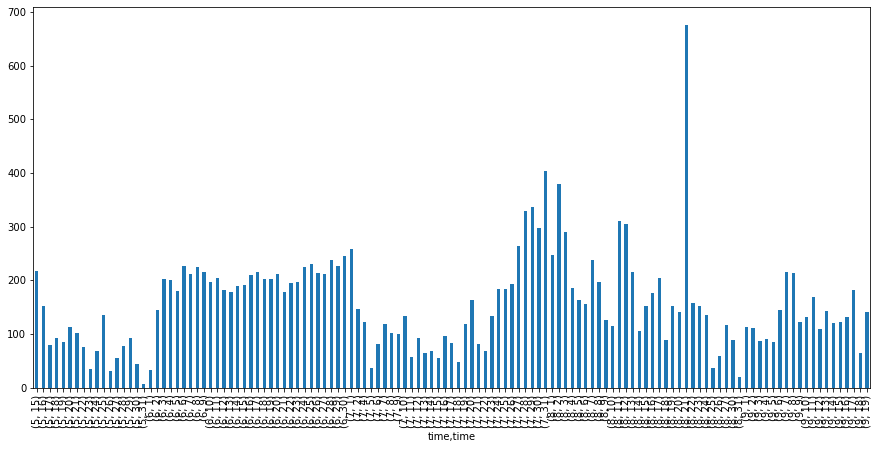

In [8]:
# Frequency of signals per day
ana.plot_freq(df)

In [8]:
features = ana.get_features(df, wf = use_wf, lpc=use_lpc, amp=use_amp)

## 2. Clustering with Self Organizing Maps

### Bayesian optimization of quantization and topological error

In [9]:
# Train som

size_x = 25
size_y = 25
niter = 59000 #10000
sigma = 2.2 # #0.3
learning_rate= .013 #.5
pca=False
random_seed = 2

"""
size_x = 10
size_y = 6
niter = 50000 #20000 #10000
sigma = 1.23 # #0.3
learning_rate= .04 #.5
pca=False
random_seed = 2
"""

'\nsize_x = 10\nsize_y = 6\nniter = 50000 #20000 #10000\nsigma = 1.23 # #0.3\nlearning_rate= .04 #.5\npca=False\nrandom_seed = 2\n'

In [ ]:
from skopt.space import Real, Categorical, Integer

# Skopt dimensions
skopt_dims = [       
    Real(        low=1e-2, high=1,     prior='log-uniform', name='learning_rate'     ),
    Real(        low=.1,    high=5,                         name='sigma'     ),
    Real(     low=1e2,    high=1e5,   prior='log-uniform', name='niter'       )
]

# Initial parameters
init_param = {'learning_rate':0.5, 'sigma':0.3, 'niter' : 10000}

search_result = ana.optimize(skopt_dims, init_param, features, size_x, size_y,
                             num_calls=20, pca = pca, random_seed = random_seed)

0.332069375313
0.346341993801
0.337207751168
0.326534725862
0.319942155647
0.316374347562
0.311573424126
0.30798140868
0.304161650418
0.301126835036
0.298257946443
0.29553153135
0.29293793248
0.291031335349
0.289252111569
0.287080735428
0.284427938398
0.282684205778
0.280671852805
0.278831855673
0.277329540661
0.275784770564
0.274303374301
0.272623657834
0.271082025741
0.269371616151
0.268050636914
0.266639389666
0.265349678464
0.263955747023
0.262814942399
0.261625729462
0.260435990373
0.259482879636
0.258318765492
0.257392751983
0.256597899775
0.255625268793
0.254606540597
0.253671480014
0.252991314115
0.252064931041
0.25129835711
0.250421541887
0.24956113488
0.248814139754
0.248125053768
0.247398190872
0.246547361749
0.245852212063
0.24515766075
0.244533728487
0.243916236088
0.243291118671
0.242688939578
0.242125458466
0.241446999668
0.240833117277
0.240188815819


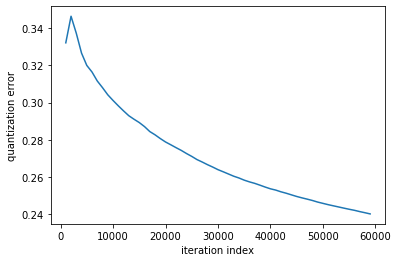

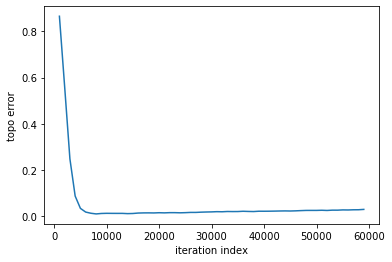

In [10]:
som = ana.run_som(features, size_x, size_y, niter = niter, sigma=sigma, learning_rate=learning_rate, 
                  pca=pca, plot_error = True, random_seed = random_seed)

### Visualize the nodes

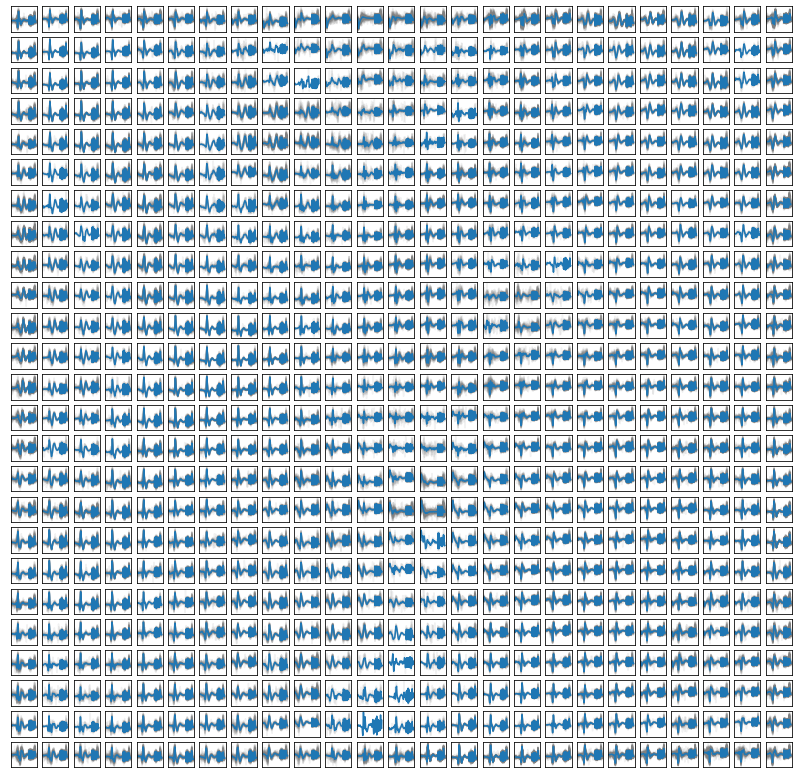

In [11]:
ana.plot_waveforms(features, som, size_x, size_y )

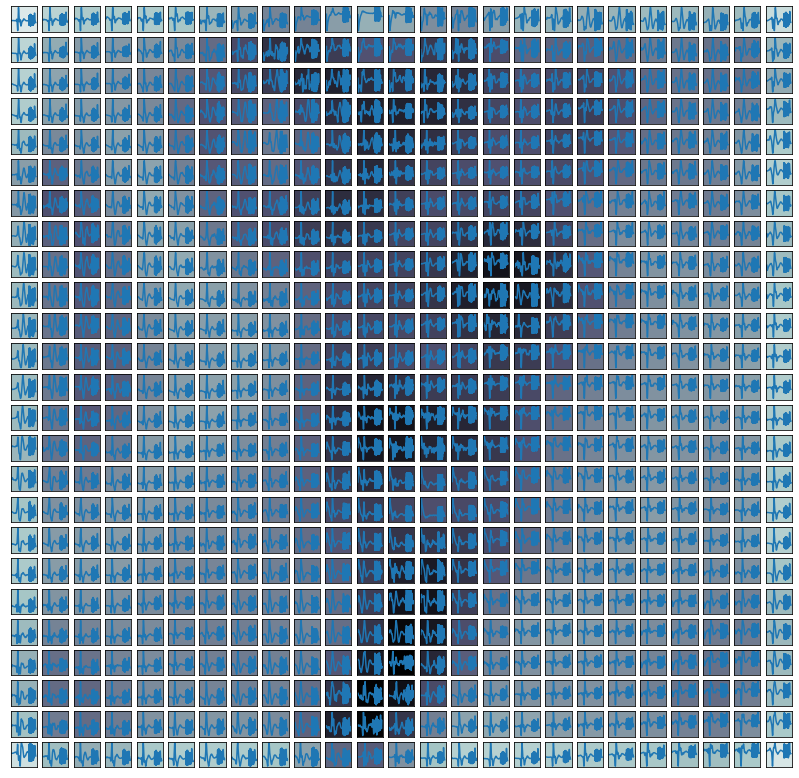

In [12]:
ana.plot_dmap(features, som, size_x, size_y)

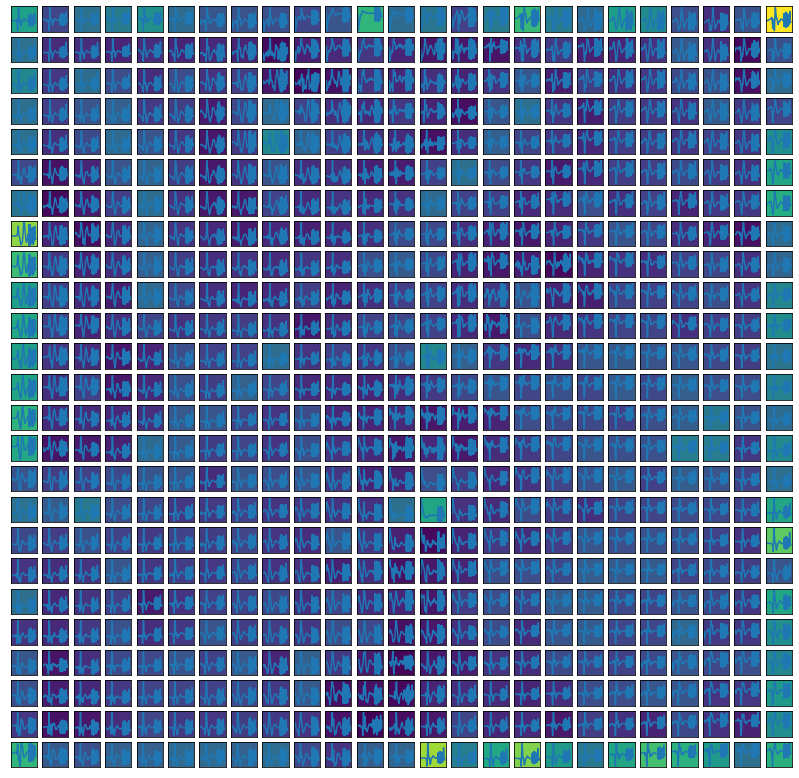

In [13]:
ana.plot_density(features, som, size_x, size_y )

### Time evolution of the nodes

In [15]:
ana.feat_to_cluster(df, som, size_x, size_y, wf = use_wf, lpc = use_lpc, amp = use_amp)

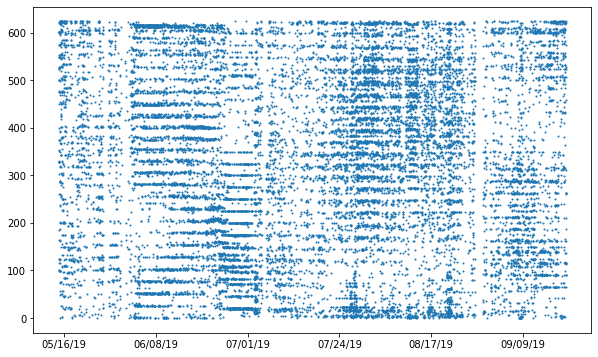

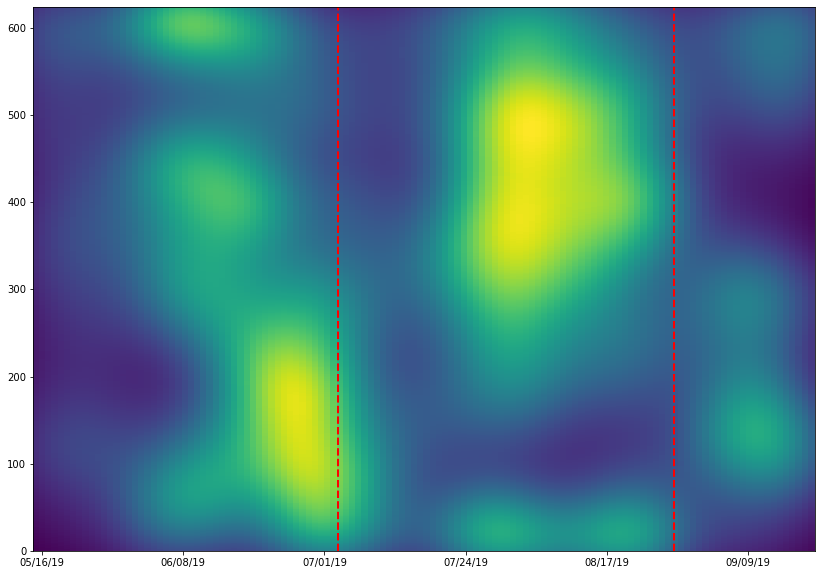

In [17]:
n_nodes = size_x * size_y
ana.plot_evo(df, 'cluster_index', n_nodes)

### Clustering of the nodes with kmeans

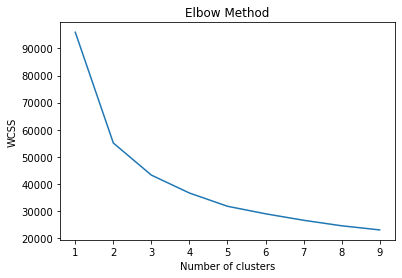

In [18]:
# Elbow method to check the number of clusters
ana.kmeans_som(som, features, size_x, size_y, n_clusters=4, run_elbow=True)

In [29]:
n_clusters = 2

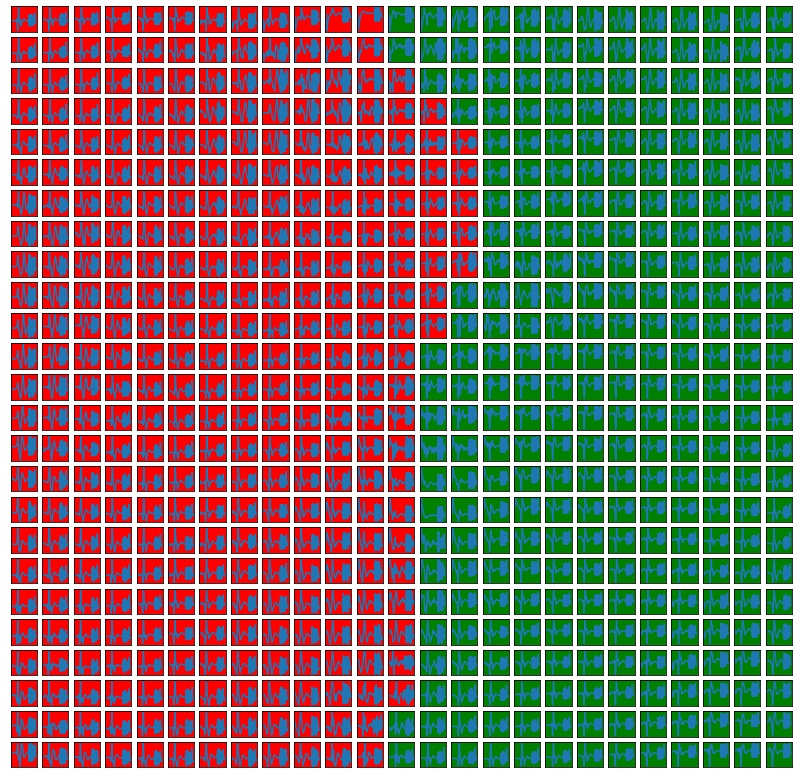

In [30]:
clusters = ana.kmeans_som(som, features, size_x, size_y, n_clusters=n_clusters)

In [31]:
ana.feat_to_cluster(df, som, size_x, size_y, wf = use_wf, lpc = use_lpc, amp = use_amp)

In [32]:
ana.som_to_kmeans_cluster(df, clusters)

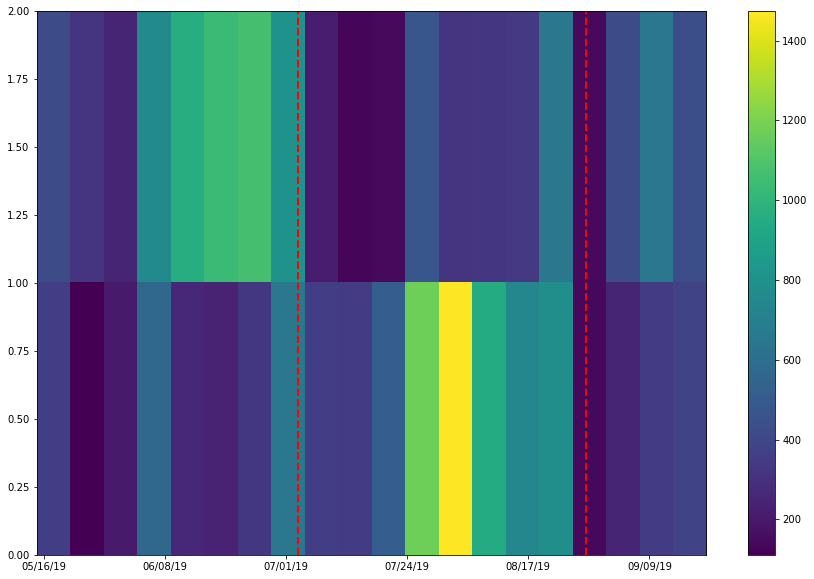

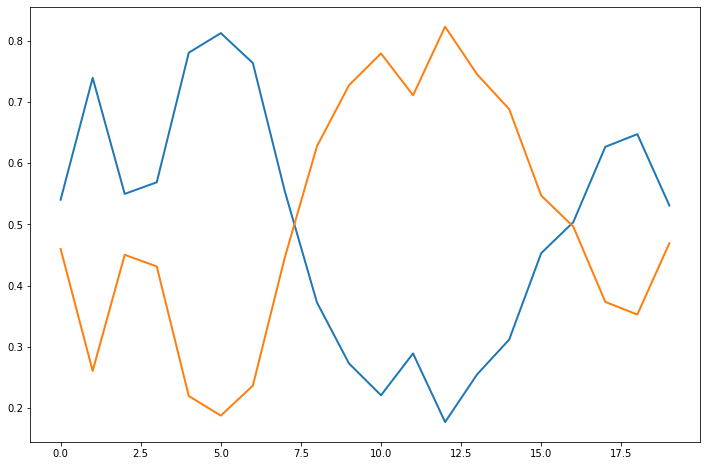

In [33]:
ana.plot_hist2d(df, 'cluster_som_kmeans', n_clusters, timebins=20)

## Clustering with K-means with T-SNE visualization

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20134 samples in 0.606s...
[t-SNE] Computed neighbors for 20134 samples in 196.024s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20134
[t-SNE] Computed conditional probabilities for sample 2000 / 20134
[t-SNE] Computed conditional probabilities for sample 3000 / 20134
[t-SNE] Computed conditional probabilities for sample 4000 / 20134
[t-SNE] Computed conditional probabilities for sample 5000 / 20134
[t-SNE] Computed conditional probabilities for sample 6000 / 20134
[t-SNE] Computed conditional probabilities for sample 7000 / 20134
[t-SNE] Computed conditional probabilities for sample 8000 / 20134
[t-SNE] Computed conditional probabilities for sample 9000 / 20134
[t-SNE] Computed conditional probabilities for sample 10000 / 20134
[t-SNE] Computed conditional probabilities for sample 11000 / 20134
[t-SNE] Computed conditional probabilities for sample 12000 / 20134
[t-SNE] Computed conditional probabilities for 

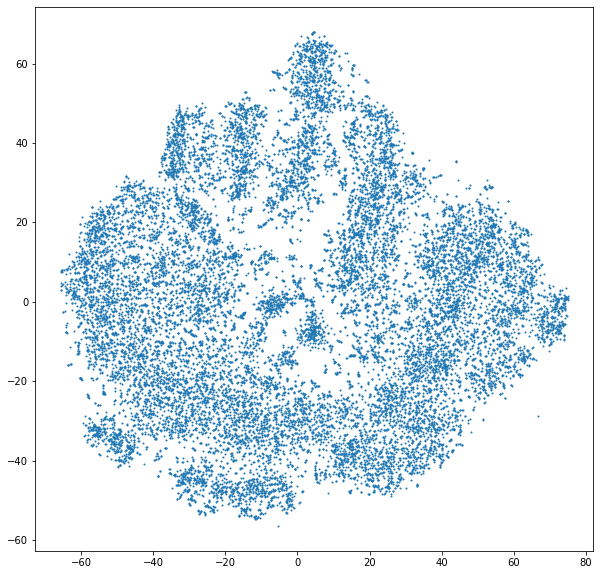

In [24]:
tsne_x, tsne_y = ana.run_tsne(features)
df['tsne_x'] = tsne_x
df['tsne_y'] = tsne_y

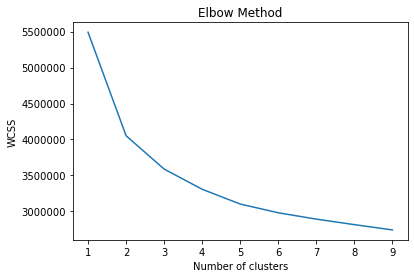

In [25]:
# Run elbow method
max_cls = 10
ana.elbow(max_cls, features)

In [34]:
# Run kmeans
n_cluster = 2
df['kmeans'] = ana.run_kmeans(features, n_cluster)

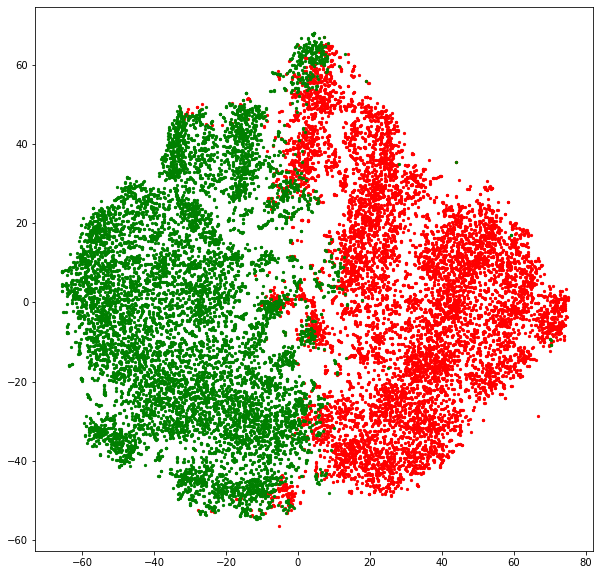

r


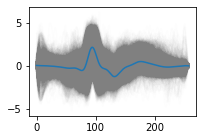

g


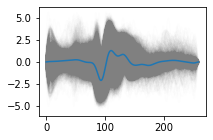

In [35]:
ana.plot_kmeans_tsne(df, 'kmeans', n_clusters)